# Import necessary libraries


In [12]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt



# Load and Display Image




In [13]:
def load_and_display_image(image_path):
 
    image = Image.open(image_path)
    if image is None:
        print("Error: Unable to load image.")
        return None


    # Display the original image
    plt.figure(figsize=(6, 6))
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return image


# Convert to Grayscale and Display
Converts the image to grayscale and displays it.


In [14]:
def convert_to_grayscale(image):

    gray = image.convert('L')

    # Display the grayscale image
    plt.figure(figsize=(6, 6))
    plt.title("Grayscale Image")
    plt.imshow(gray, cmap='gray')
    plt.axis('off')
    plt.show()

    return gray

# Apply  Median Filter and Display

This function applies a median filter to the input image array to reduce noise. 

In [15]:
def median_filter(image_array, kernel_size=3):
    
    pad = kernel_size // 2
    padded = np.pad(image_array, pad, mode='edge')
    filtered = np.zeros_like(image_array)
    
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            neighborhood = padded[i:i+kernel_size, j:j+kernel_size]
            filtered[i, j] = np.median(neighborhood)

    # Display the filtered image
    plt.figure(figsize=(6, 6))
    plt.title("Filtered Image")
    plt.imshow(filtered, cmap='gray')
    plt.axis('off')
    plt.show()
    
    return filtered


# Thresholding 
This function applies Otsu's thresholding method to the input image array to convert it into a binary image. The thresholded image is then displayed.



In [16]:
def Threshold(image_array):

    histogram, _ = np.histogram(image_array.flatten(), bins=256, range=(0,256))
    total_pixels = image_array.size
    sum_total = np.dot(np.arange(256), histogram)
    
    best_thresh, best_var = 0, 0
    sum_bg, weight_bg = 0, 0

    for thresh in range(256):
        weight_bg += histogram[thresh]
        weight_fg = total_pixels - weight_bg
        if weight_bg == 0 or weight_fg == 0:
            continue
        
        sum_bg += thresh * histogram[thresh]
        mean_bg = sum_bg / weight_bg
        mean_fg = (sum_total - sum_bg) / weight_fg
        var_between = weight_bg * weight_fg * (mean_bg - mean_fg) ** 2
        
        if var_between > best_var:
            best_var = var_between
            best_thresh = thresh
    thersh_img=(image_array < best_thresh).astype(np.uint8) * 255  

    
    plt.figure(figsize=(6, 6))
    plt.title("Thershold Image")
    plt.imshow(thersh_img)
    plt.axis('off')
    plt.show()

    return thersh_img


# Finds the barcode region
Finds the barcode region using horizontal and vertical projections.

In [17]:
def find_barcode_region(binary_image):

    horizontal_projection = np.sum(binary_image, axis=1)
    
    # Find start and end of barcode
    start, end = None, None
    for i, value in enumerate(horizontal_projection):
        if value > np.mean(horizontal_projection) * 0.5:
            if start is None:
                start = i
            end = i

    if start is None or end is None:
        return None, None, None, None
    
    # Find left and right edges of barcode
    vertical_projection = np.sum(binary_image[start:end, :], axis=0)
    left, right = None, None
    for j, value in enumerate(vertical_projection):
        if value > np.mean(vertical_projection) * 0.5:
            if left is None:
                left = j
            right = j
    
    return left, right, start, end


#  Detect Barcode 
Function to detect and mark barcode region .

In [18]:
def detect_barcode(image_path):

    try:
        # Load image and convert to grayscale
        image = load_and_display_image(image_path)
        gray_image = convert_to_grayscale(image)
        img_array = np.array(gray_image)

        # Step 1: Noise Reduction
        filtered = median_filter(img_array)

        # Step 2: Binarization 
        binary = Threshold(filtered)

        # Step 3: Locate Barcode Region
        left, right, start, end = find_barcode_region(binary)
        
        if left is None or right is None or start is None or end is None:
            print("No barcode detected.")
            return

        # Draw Bounding Box on Image
        output = image.convert('RGB')
        draw = ImageDraw.Draw(output)
        draw.rectangle([left, start, right, end], outline="red", width=2)

        # Display the extracted QR code region
        plt.figure(figsize=(6, 6))
        plt.title("Extracted QR Code Region")
        plt.imshow(output)
        plt.axis('off')
        plt.show()

       

    except Exception as e:
        print(f"Error: {e}")


# Test cases



## Test case 1

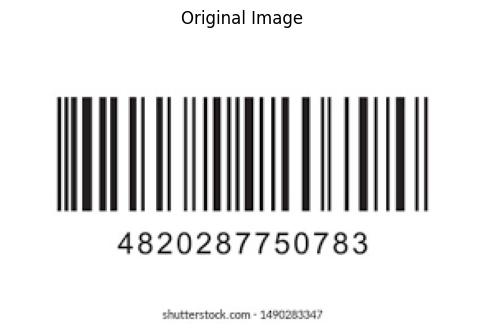

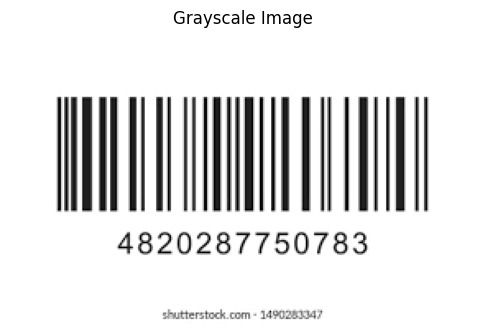

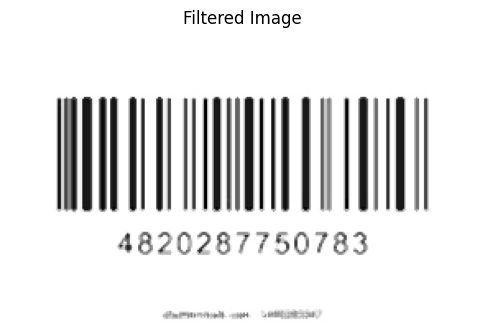

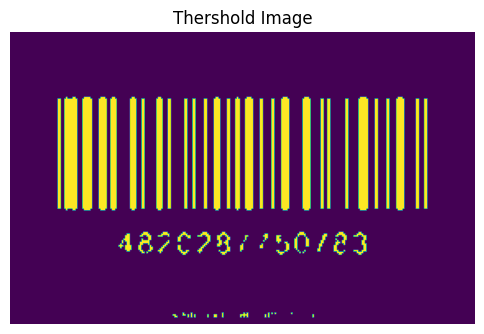

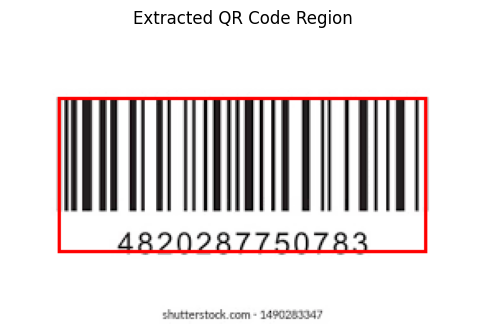

In [ ]:
image_path = "images\\1.jpg"  


detect_barcode(image_path)


## Test case 2

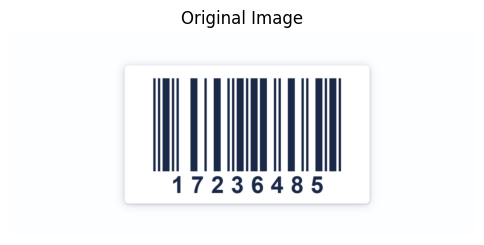

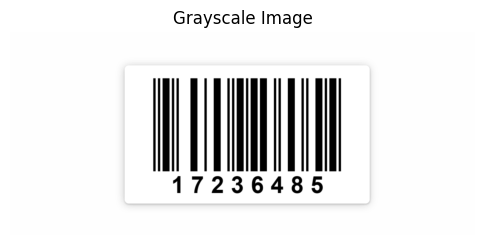

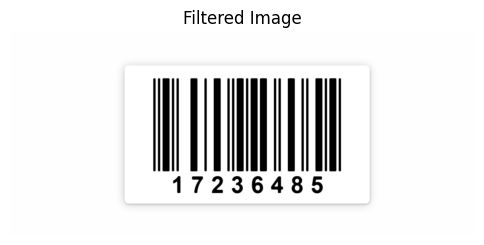

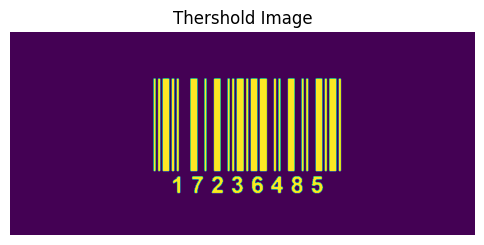

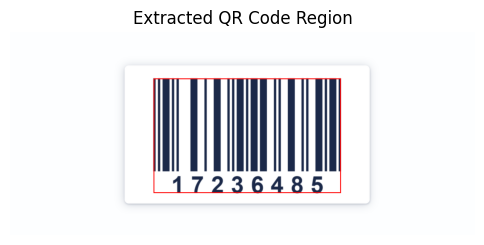

In [25]:
image_path = "images\\2.jpg"  


detect_barcode(image_path)


## Test case 3

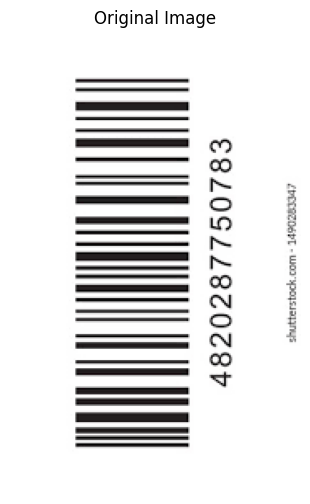

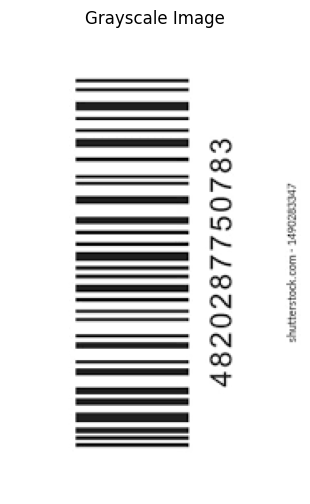

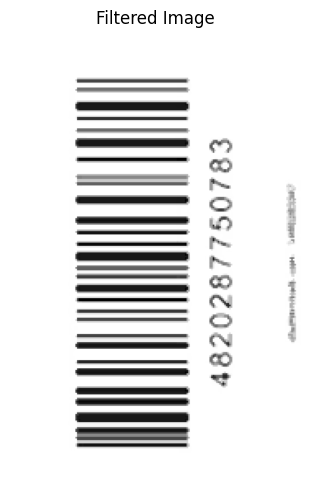

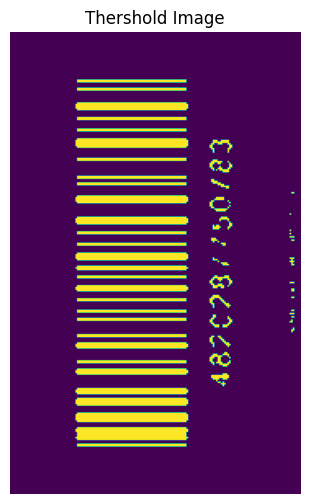

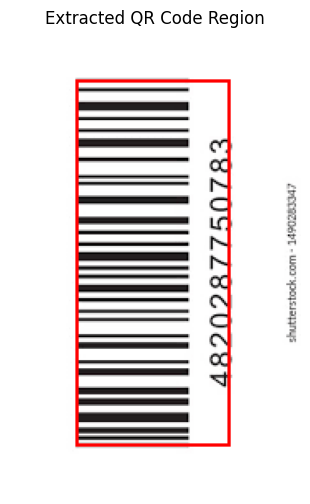

In [23]:
image_path = "images\\3.jpg"  


detect_barcode(image_path)


## Test case 3

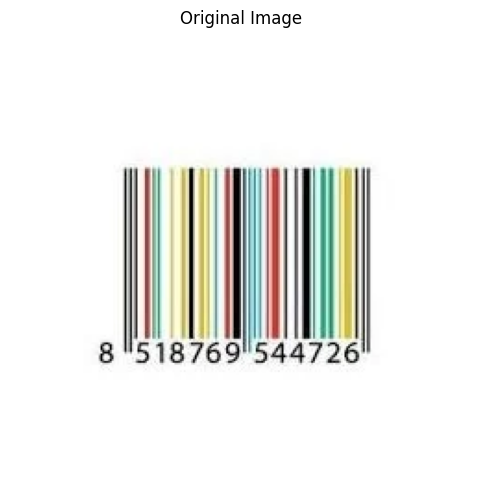

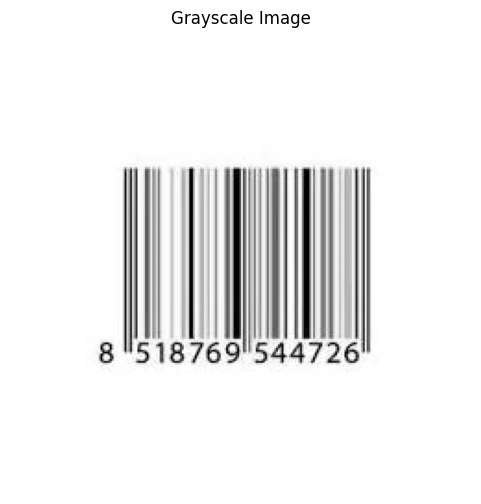

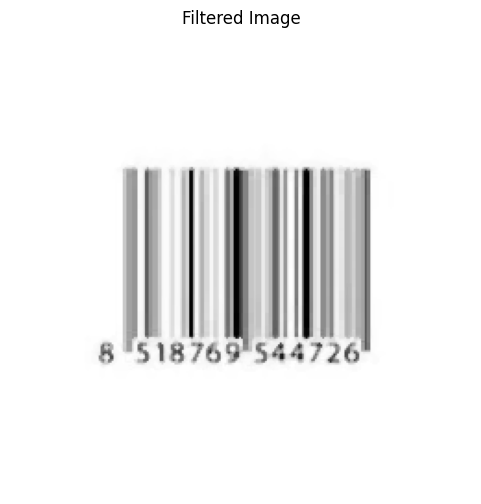

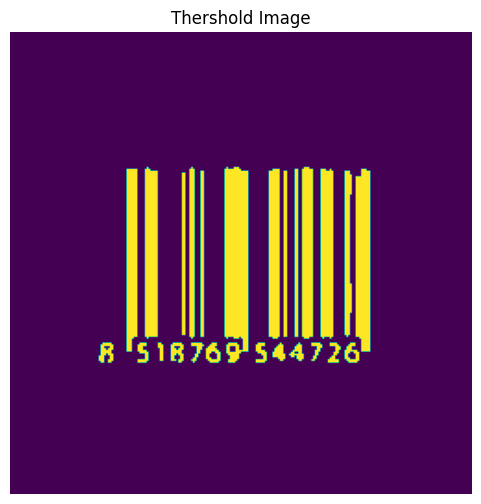

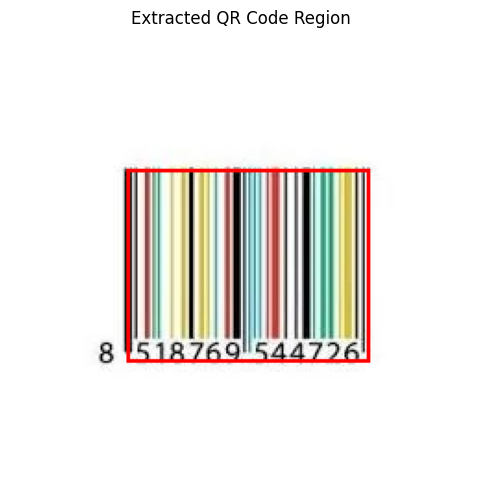

In [26]:
image_path = "images\\4.jpg"  


detect_barcode(image_path)
